# Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import missingno as msno
import seaborn as sns 

# Partie 1

## Etape 1 : Charger les données

In [13]:
# Dossier contenant CSV
data_folder = Path("Data")

# Boucle sur chaque fichier CSV du dossier
for csv_path in data_folder.glob("*.csv"):
    # On récupère le nom du fichier sans extension
    var_name = f"{csv_path.stem}_df"
    # On lit le CSV dans un DataFrame
    df = pd.read_csv(csv_path)
    # On crée dynamiquement la variable dans l'espace global
    globals()[var_name] = df

In [14]:
# Get all variables in global scope that end with '_df'
dataframes = {name: var for name, var in globals().items() if name.endswith('_df')}

# Display DataFrame names
print("Available DataFrames:")
for df_name in dataframes.keys():
    print(f"- {df_name}")

Available DataFrames:
- EdStatsCountry_df
- EdStatsCountry-Series_df
- EdStatsData_df
- EdStatsFootNote_df
- EdStatsSeries_df


## Etape 2 : Collecter les informations basiques des jeux de données

In [42]:
def analyze_basic_info(df):
    """Analyze basic DataFrame information"""
    info = {
        "rows": df.shape[0],
        "columns": df.shape[1],
        "dtypes": df.dtypes.value_counts()
    }
    return info

def calculate_dataframe_size(df):
    """
    Calculate the memory usage of a DataFrame in different units
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze
    
    Returns:
    --------
    dict
        Dictionary containing memory usage in bytes, KB, MB, and GB
    """
    # Get memory usage in bytes
    memory_bytes = df.memory_usage(deep=True).sum()
    
    # Convert to different units
    memory_kb = memory_bytes / 1024
    memory_mb = memory_kb / 1024
    memory_gb = memory_mb / 1024
    
    return {
        'bytes': f"{memory_bytes:,.0f} bytes",
        'kilobytes': f"{memory_kb:,.2f} KB",
        'megabytes': f"{memory_mb:,.2f} MB",
        'gigabytes': f"{memory_gb:,.2f} GB"
    }

def identify_row_structure(df):
    """Identify what each row represents"""
    country_cols = [col for col in df.columns if 'country' in col.lower()]
    indicator_cols = [col for col in df.columns if 'indicator' in col.lower()]
    
    if country_cols and indicator_cols:
        return "combination of country and indicator", country_cols, indicator_cols
    elif country_cols:
        return "country", country_cols, []
    elif indicator_cols:
        return "indicator", [], indicator_cols
    return "unknown structure", [], []

def analyze_missing_values(df, threshold=80):
    """Analyze and handle missing values"""
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    cols_to_drop = missing_pct[missing_pct > threshold].index
    
    return {
        "missing_percentages": missing_pct[missing_pct > 0],
        "columns_to_drop": cols_to_drop
    }

def analyze_numerical_columns(df):
    """Analyze numerical columns"""
    numerical_cols = df.select_dtypes(include=['float64', 'int64'])
    if not numerical_cols.empty:
        return numerical_cols.describe()
    return None

def analyze_categorical_columns(df):
    """Analyze categorical columns"""
    categorical_cols = df.select_dtypes(include=['object'])
    results = {}
    for col in categorical_cols:
        unique_values = df[col].nunique()
        value_counts = df[col].value_counts().head()
        results[col] = {
            "unique_values": unique_values,
            "top_values": value_counts
        }
    return results

def analyze_dataframe(df, name):
    """Main function to analyze a DataFrame"""
    print(f"\n{'='*50}")
    print(f"Analysis of {name}")
    print(f"{'='*50}")
    
    # 1. Basic Information
    basic_info = analyze_basic_info(df)
    print("\n📊 Basic Information:")
    print(f"Rows: {basic_info['rows']:,}")
    print(f"Columns: {basic_info['columns']:,}")
    # Calculate and display DataFrame size
    size_info = calculate_dataframe_size(df)
    print("\n💾 Memory Usage:")
    print(f"Size: {size_info['megabytes']} ({size_info['bytes']})")
    
    # 2. Row Structure
    structure, country_cols, indicator_cols = identify_row_structure(df)
    print(f"\n🔍 Row Structure: Each row represents a {structure}")
    
    # 3. Duplicates
    duplicates = df.duplicated().sum()
    print(f"\n🔄 Duplicates found: {duplicates:,}")
    if duplicates > 0:
        df = df.drop_duplicates()
    
    # 4. Missing Values
    missing_analysis = analyze_missing_values(df)
    msno.matrix(df)
    plt.show()

    print("\n❓ Missing Values (%):")
    print(missing_analysis["missing_percentages"])
    
    if len(missing_analysis["columns_to_drop"]) > 0:
        df = df.drop(columns=missing_analysis["columns_to_drop"])
        print(f"\nDropped columns: {', '.join(missing_analysis['columns_to_drop'])}")
    
    # 5. Numerical Analysis
    num_stats = analyze_numerical_columns(df)
    if num_stats is not None:
        print("\n📈 Numerical Columns Statistics:")
        print(num_stats)
    
    # 6. Categorical Analysis
    cat_stats = analyze_categorical_columns(df)
    if cat_stats:
        print("\n📊 Categorical Columns Analysis:")
        for col, stats in cat_stats.items():
            print(f"\n{col} - {stats['unique_values']} unique values")
            print(stats['top_values'])
    
    return df

### Analyse EdStatsCountry_df


Analysis of EdStatsCountry_df

📊 Basic Information:
Rows: 241
Columns: 31

💾 Memory Usage:
Size: 0.40 MB (423,474 bytes)

🔍 Row Structure: Each row represents a country

🔄 Duplicates found: 0


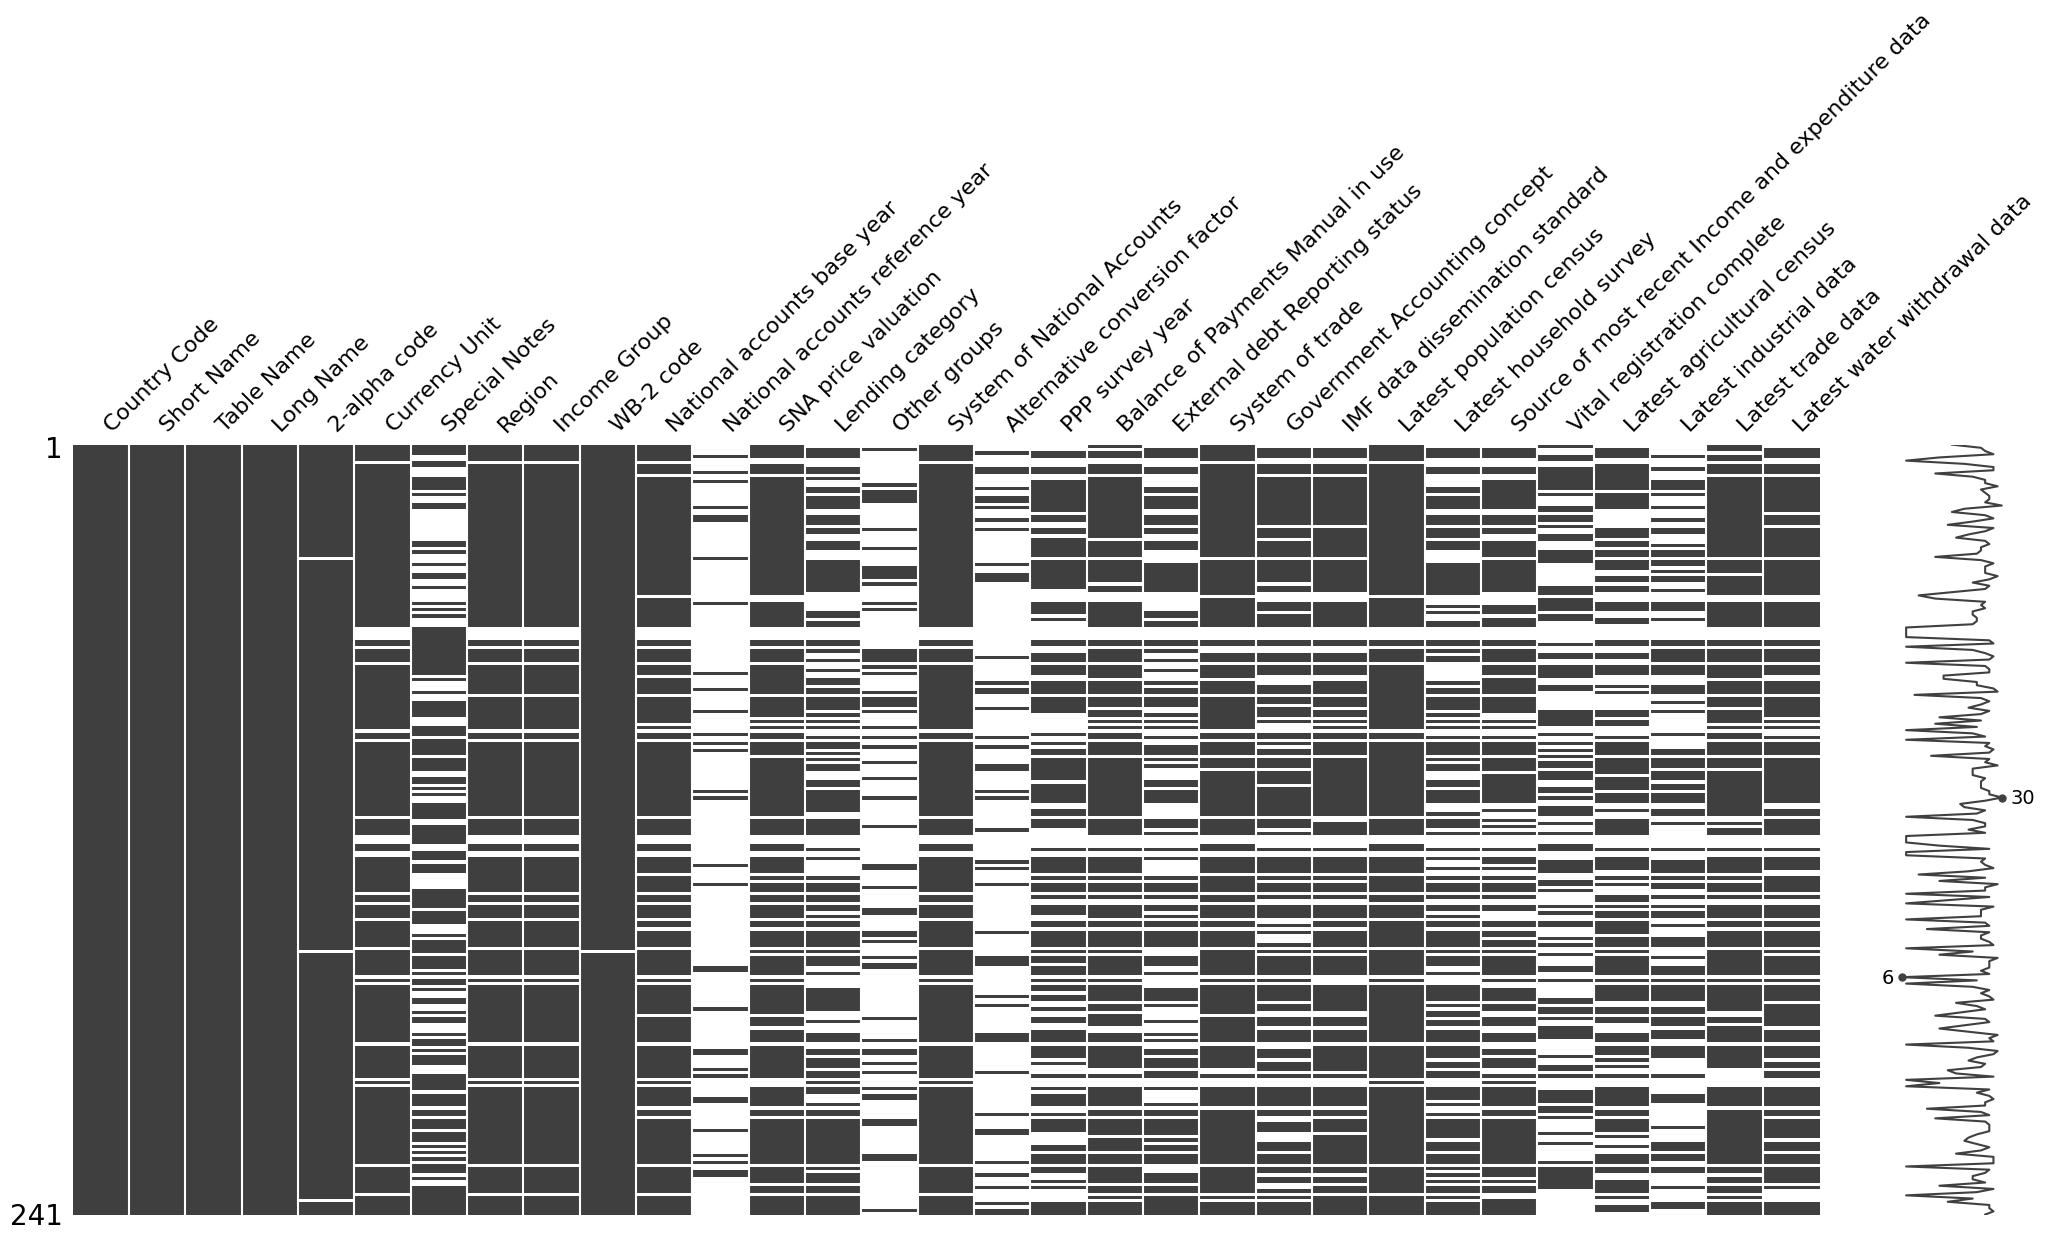


❓ Missing Values (%):
2-alpha code                                          1.244813
Currency Unit                                        10.788382
Special Notes                                        39.834025
Region                                               11.203320
Income Group                                         11.203320
WB-2 code                                             0.414938
National accounts base year                          14.937759
National accounts reference year                     86.721992
SNA price valuation                                  18.257261
Lending category                                     40.248963
Other groups                                         75.933610
System of National Accounts                          10.788382
Alternative conversion factor                        80.497925
PPP survey year                                      39.834025
Balance of Payments Manual in use                    24.896266
External debt Reporting status  

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002


In [43]:
analyze_dataframe(dataframes['EdStatsCountry_df'], "EdStatsCountry_df")

### Analyse EdStatsCountry-Series_df


Analysis of EdStatsCountry-Series_df

📊 Basic Information:
Rows: 613
Columns: 3

💾 Memory Usage:
Size: 0.13 MB (133,254 bytes)

🔍 Row Structure: Each row represents a country

🔄 Duplicates found: 0


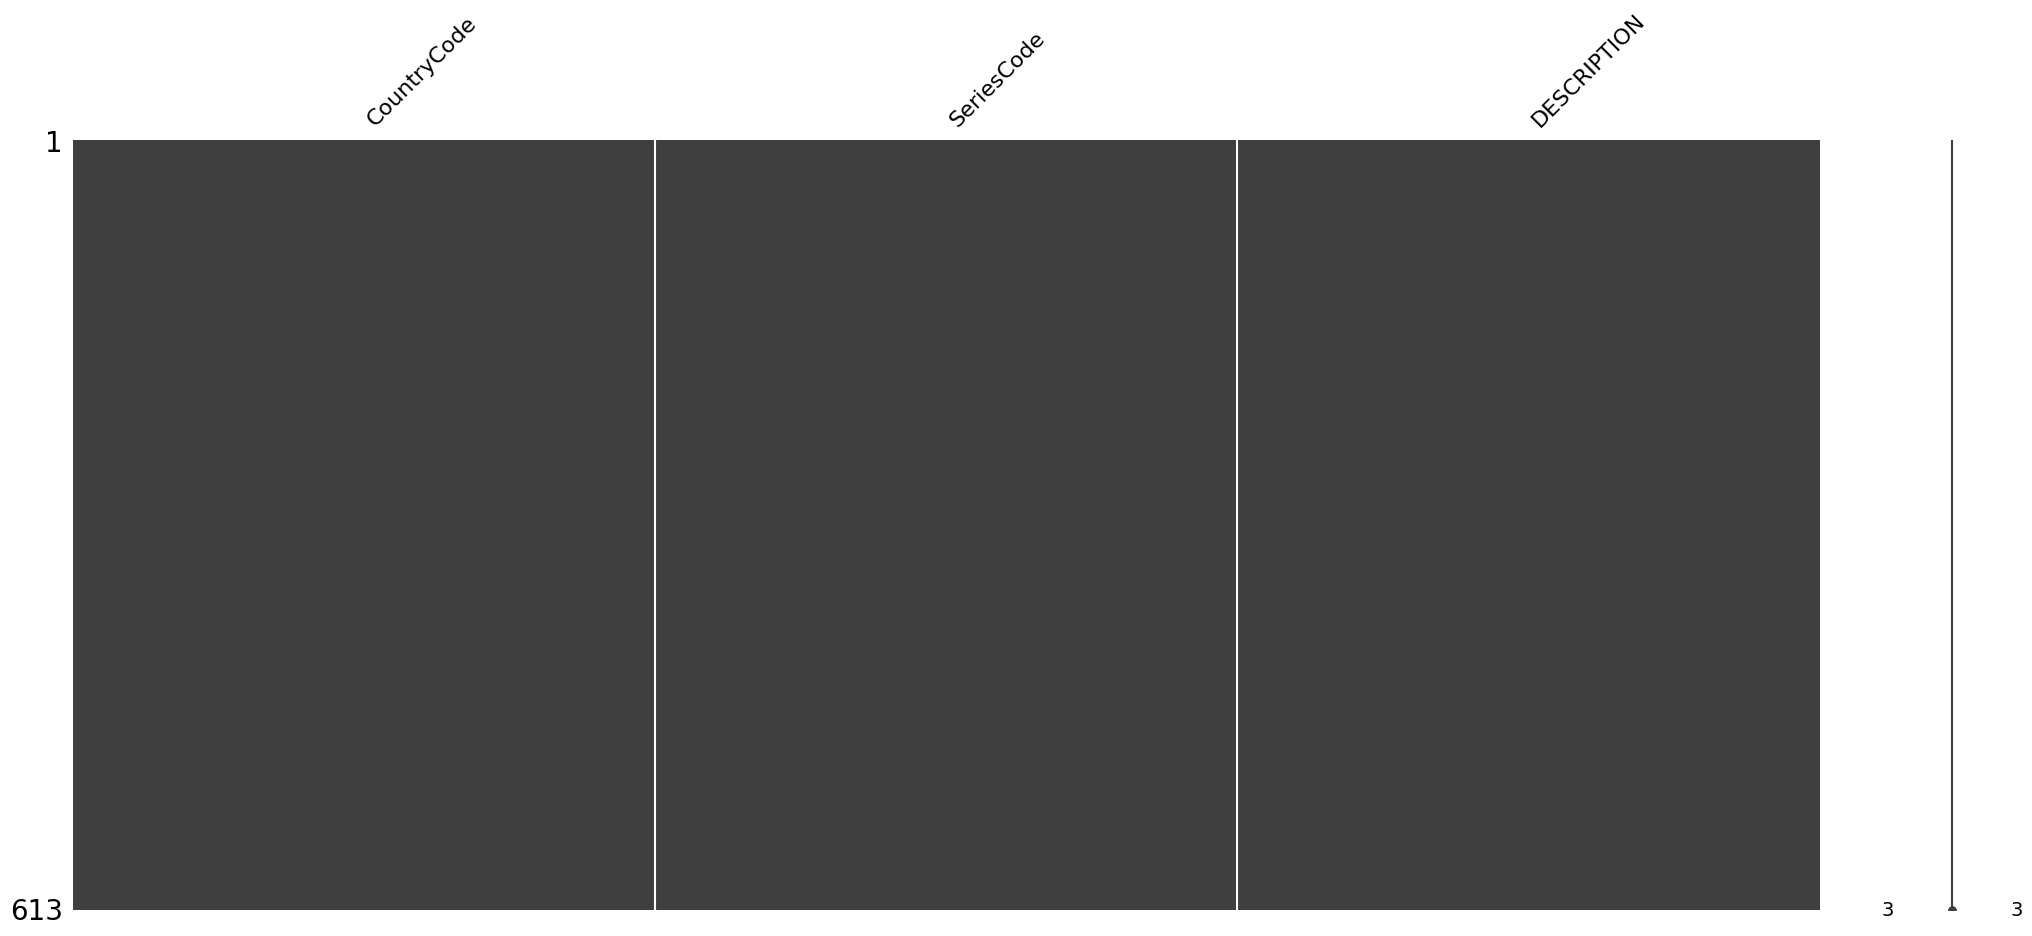


❓ Missing Values (%):
Series([], dtype: float64)

📊 Categorical Columns Analysis:

CountryCode - 211 unique values
CountryCode
MDA    18
GEO    18
CYP    12
SRB    12
MUS    12
Name: count, dtype: int64

SeriesCode - 21 unique values
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
Name: count, dtype: int64

DESCRIPTION - 97 unique values
DESCRIPTION
Data sources : United Nations World Population Prospects                154
Data sources: United Nations World Population Prospects                 137
Estimates are based on regression.                                       84
Data sources : Eurostat                                                  54
Derived using ratio of age group from WPP and World Bank population.     24
Name: count, dtype: int64


,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...


In [44]:
analyze_dataframe(dataframes['EdStatsCountry-Series_df'], "EdStatsCountry-Series_df")

### Analyse EdStatsData_df


Analysis of EdStatsData_df

📊 Basic Information:
Rows: 886,930
Columns: 69

💾 Memory Usage:
Size: 699.61 MB (733,591,641 bytes)

🔍 Row Structure: Each row represents a combination of country and indicator

🔄 Duplicates found: 0


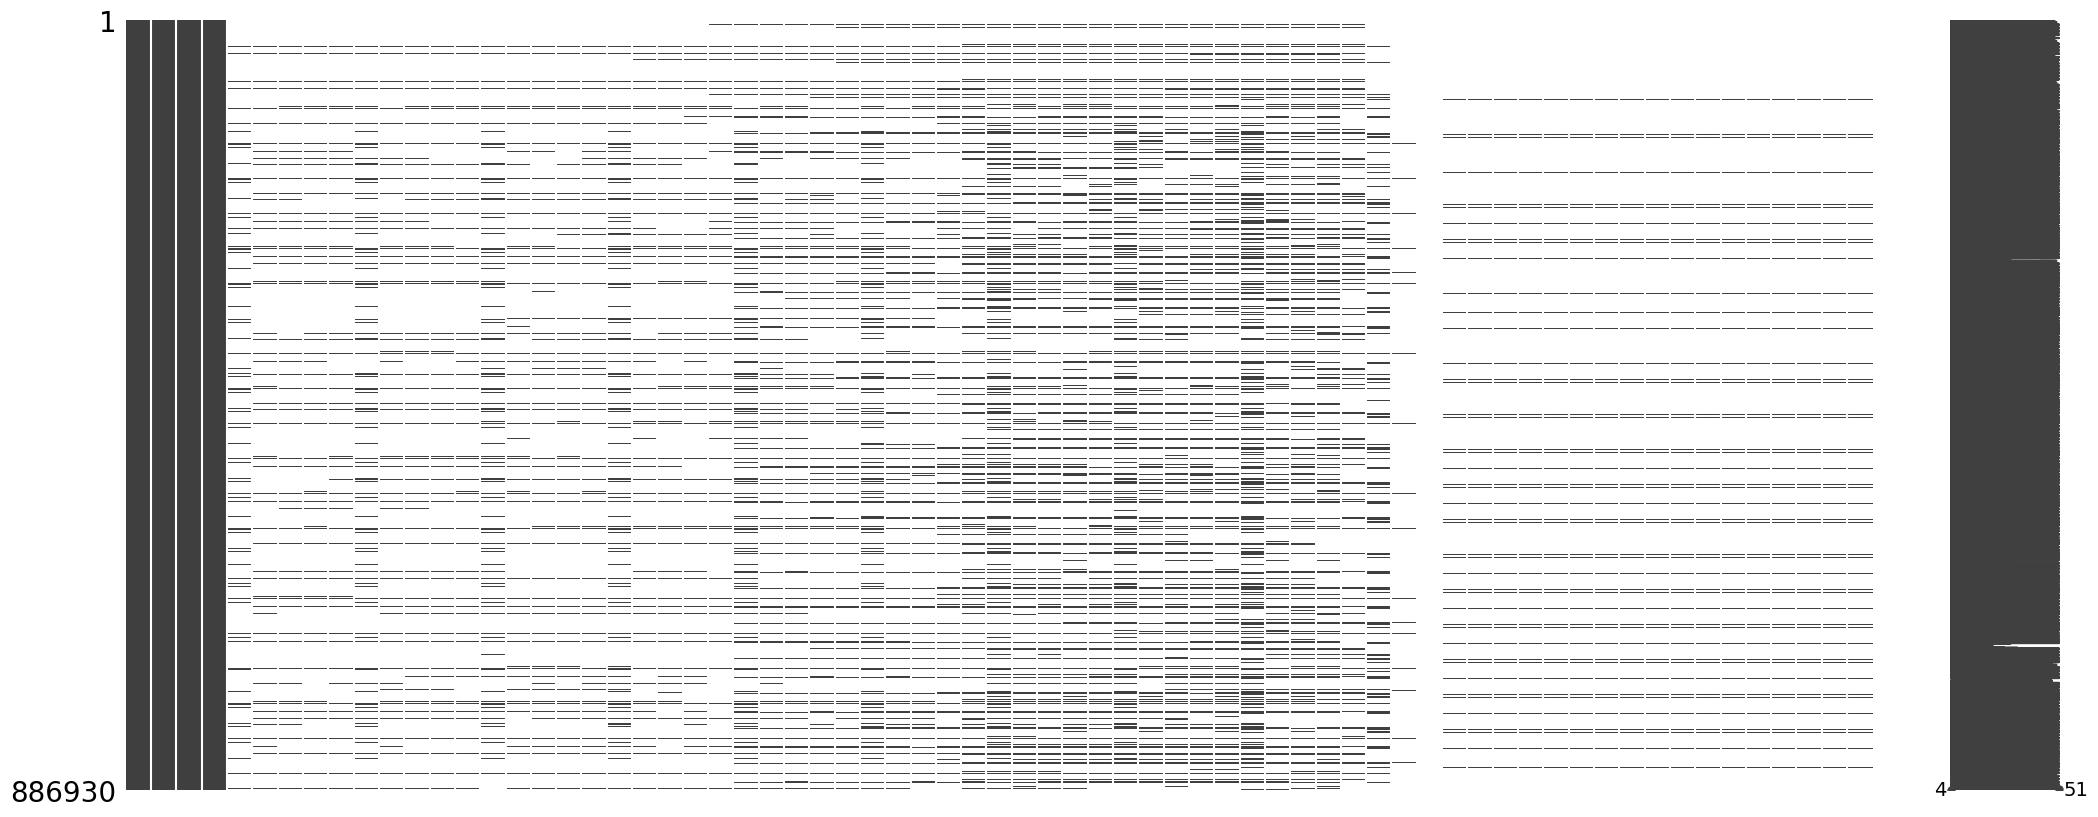


❓ Missing Values (%):
1970    91.849639
1971    95.993258
1972    95.984012
1973    95.992356
1974    95.971497
          ...    
2080    94.200670
2085    94.200670
2090    94.200670
2095    94.200670
2100    94.200670
Length: 65, dtype: float64

Dropped columns: 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100

📈 Numerical Columns Statistics:
               2005          2010
count  1.841080e+05  2.424420e+05
mean   1.188637e+10  1.189592e+10
std    5.576181e+11  6.218710e+11
min   -1.347240e+05 -4.969050e+05
25%    5.720000e+00  1.322703e+00
50%    5.031512e+01  2.046020e+01
75%    2.993150e+04  3.121000e+03
max    7.624045e+13  9.134676e+13

📊 Categorical Col

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2010
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,82.489487,85.211998
...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN


In [45]:
analyze_dataframe(dataframes['EdStatsData_df'], "EdStatsData_df")

### Analyse EdStatsFootNote_df


Analysis of EdStatsFootNote_df

📊 Basic Information:
Rows: 643,638
Columns: 4

💾 Memory Usage:
Size: 150.14 MB (157,437,786 bytes)

🔍 Row Structure: Each row represents a country

🔄 Duplicates found: 0


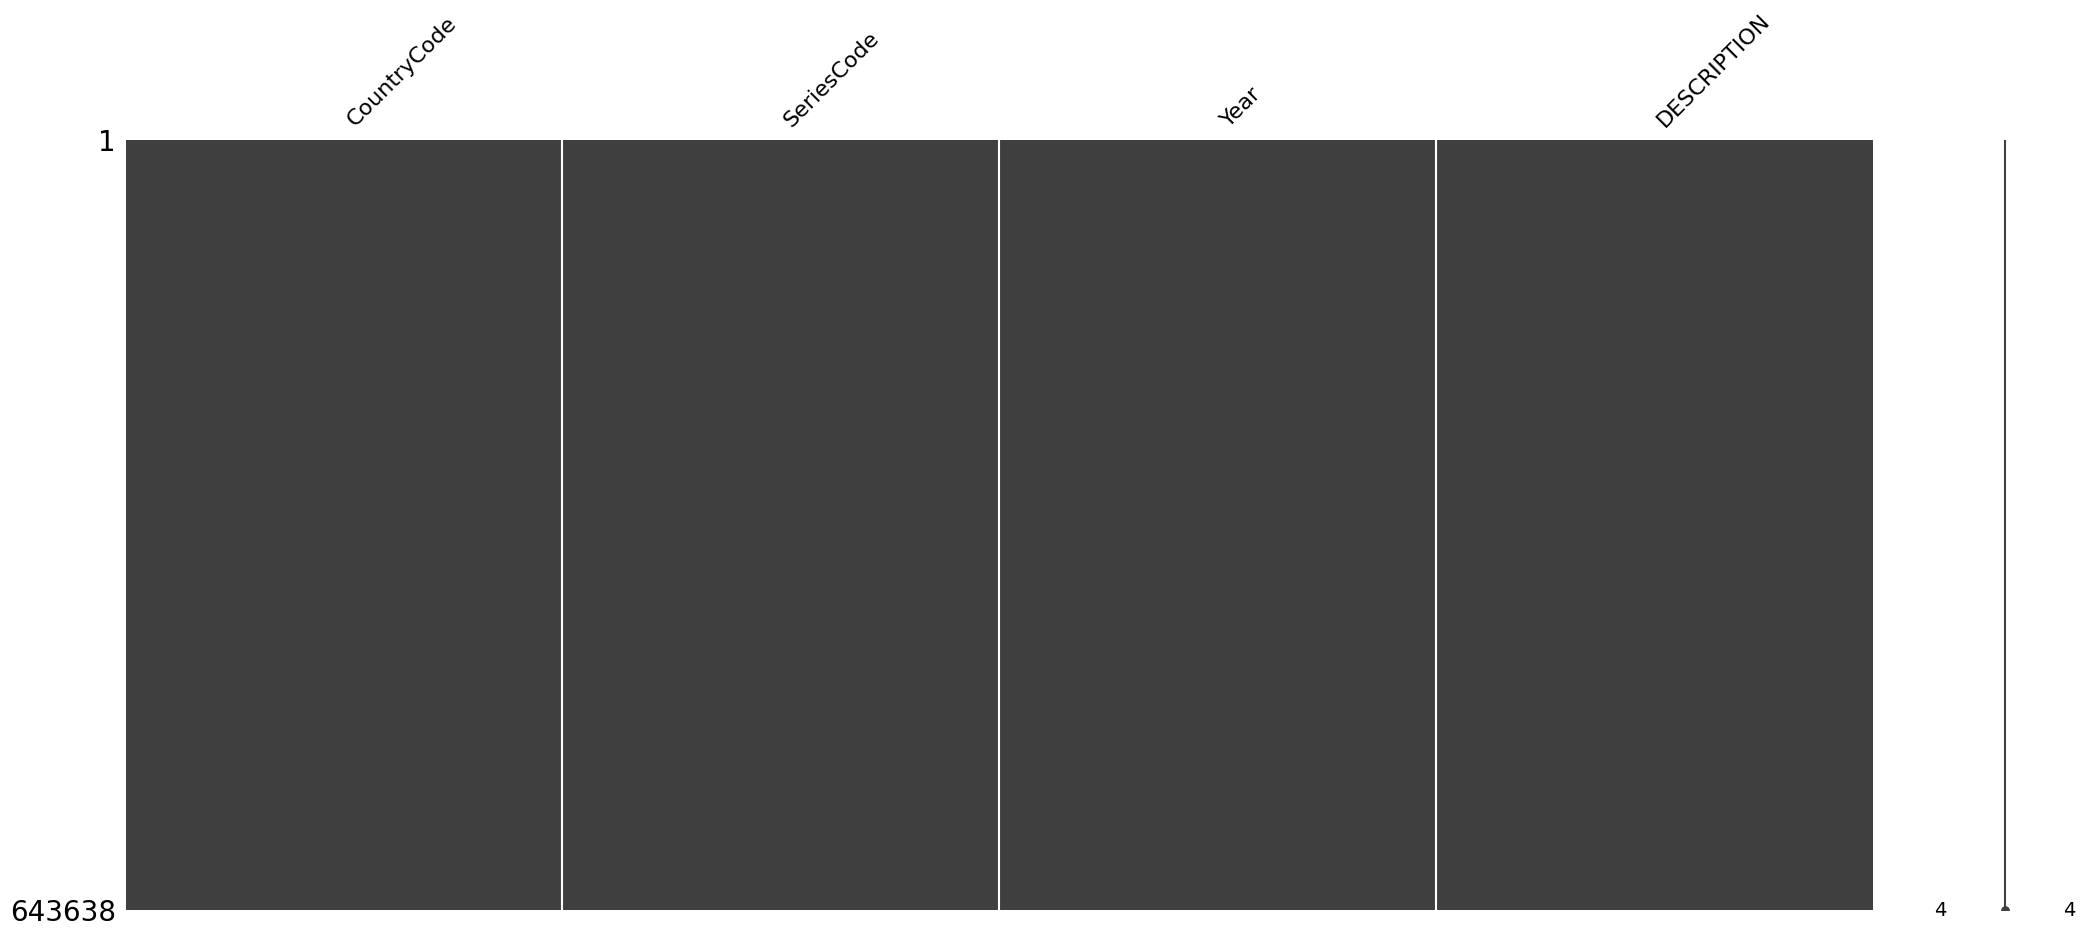


❓ Missing Values (%):
Series([], dtype: float64)

📊 Categorical Columns Analysis:

CountryCode - 239 unique values
CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
Name: count, dtype: int64

SeriesCode - 1558 unique values
SeriesCode
SH.DYN.MORT    9226
SE.PRM.AGES    8771
SE.PRM.DURS    8771
SE.SEC.DURS    8619
SE.SEC.AGES    8581
Name: count, dtype: int64

Year - 56 unique values
Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
Name: count, dtype: int64

DESCRIPTION - 9102 unique values
DESCRIPTION
Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
Name: count, dtype: int64


,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.
...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s


In [46]:
analyze_dataframe(dataframes['EdStatsFootNote_df'], "EdStatsFootNote_df") 

### Analyse EdStatsSeries_df


Analysis of EdStatsSeries_df

📊 Basic Information:
Rows: 3,665
Columns: 15

💾 Memory Usage:
Size: 6.38 MB (6,686,840 bytes)

🔍 Row Structure: Each row represents a indicator

🔄 Duplicates found: 0


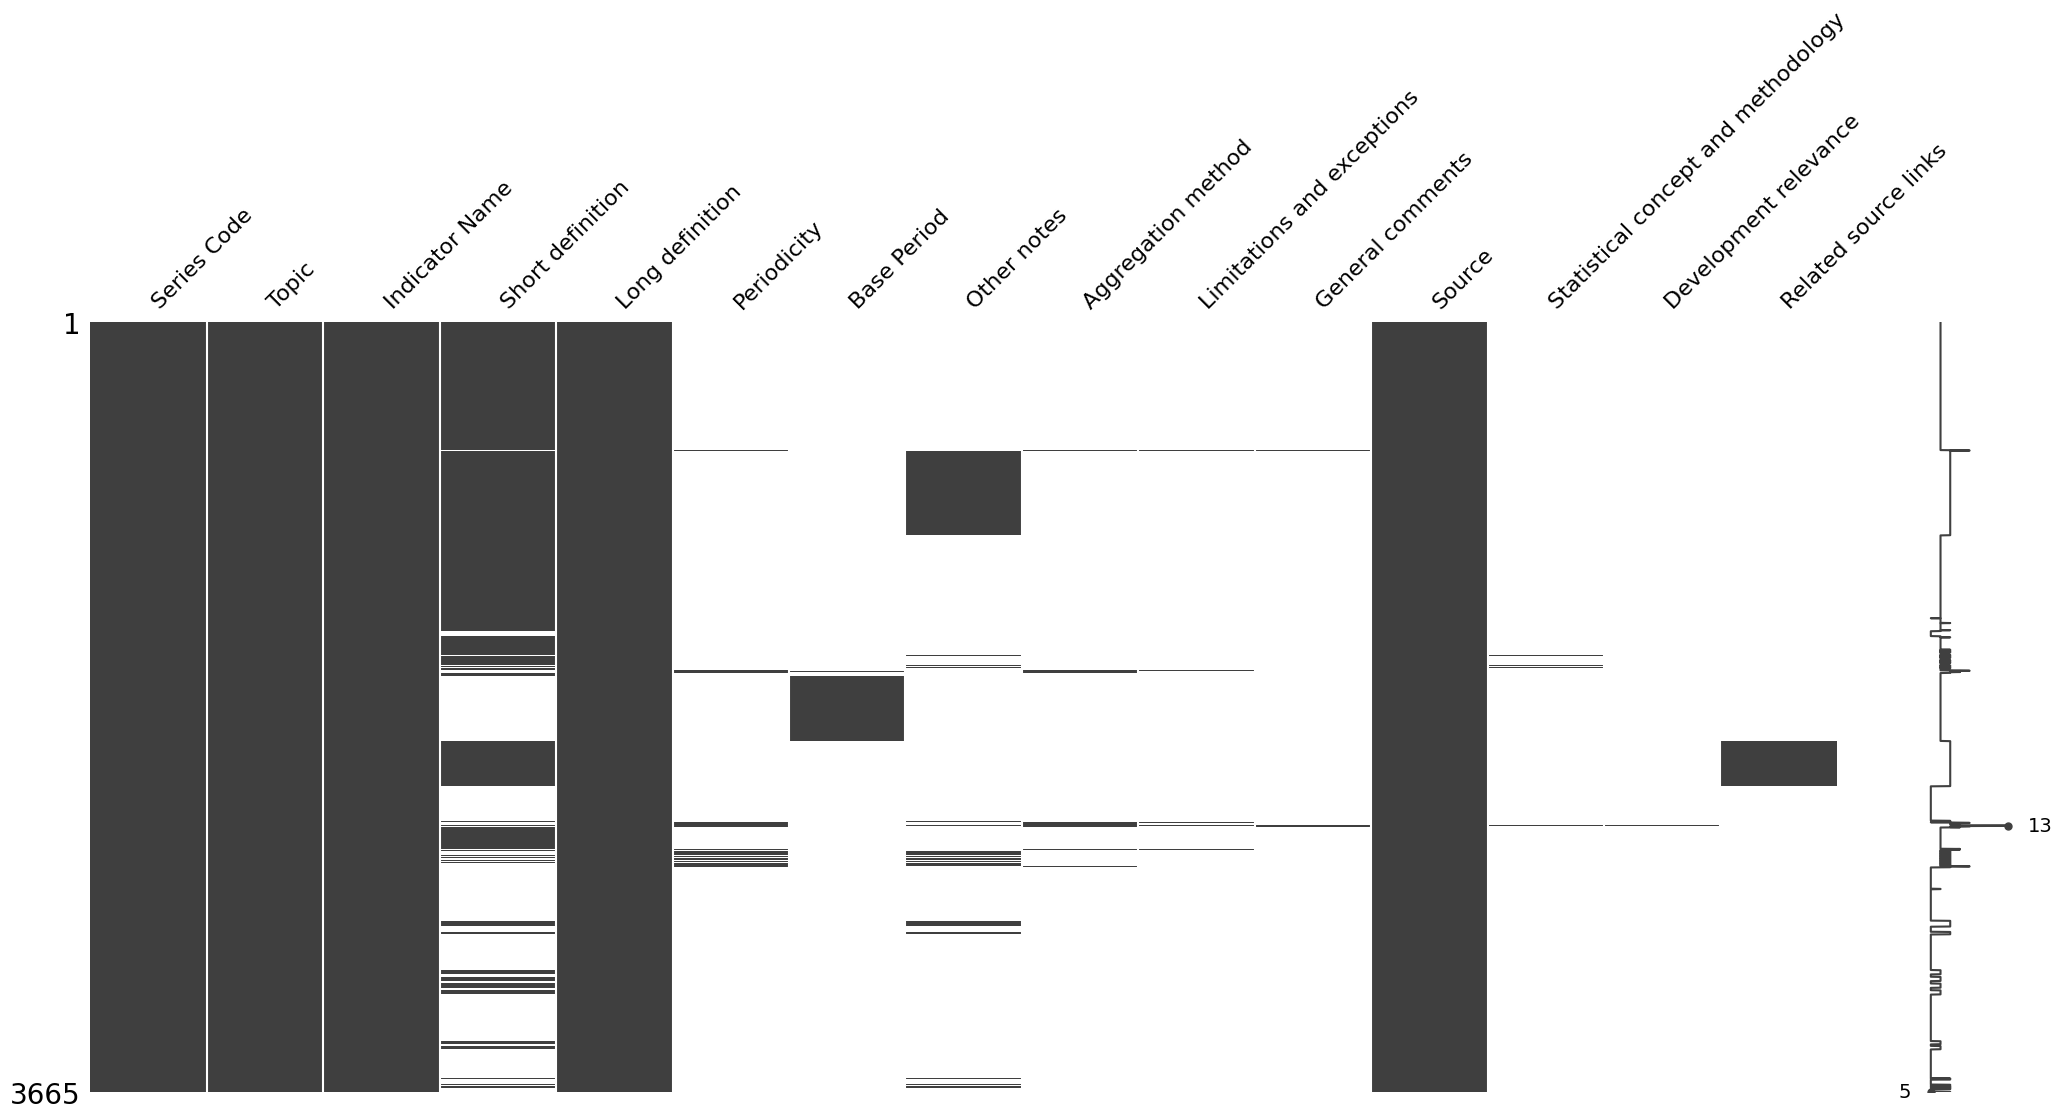


❓ Missing Values (%):
Short definition                       41.173261
Periodicity                            97.298772
Base Period                            91.432469
Other notes                            84.938608
Aggregation method                     98.717599
Limitations and exceptions             99.618008
General comments                       99.618008
Statistical concept and methodology    99.372442
Development relevance                  99.918145
Related source links                   94.133697
dtype: float64

Dropped columns: Periodicity, Base Period, Other notes, Aggregation method, Limitations and exceptions, General comments, Statistical concept and methodology, Development relevance, Related source links

📊 Categorical Columns Analysis:

Series Code - 3665 unique values
Series Code
BAR.NOED.1519.FE.ZS    1
SP.POP.0710.FE.UN      1
SP.POP.0710.TO.UN      1
SP.POP.0711.FE.UN      1
SP.POP.0711.MA.UN      1
Name: count, dtype: int64

Topic - 37 unique values
Topic
Learni

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,Robert J. Barro and Jong-Wha Lee: http://www.b...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,Robert J. Barro and Jong-Wha Lee: http://www.b...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,Robert J. Barro and Jong-Wha Lee: http://www.b...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",UNESCO Institute for Statistics
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",UNESCO Institute for Statistics
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",UNESCO Institute for Statistics
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",UNESCO Institute for Statistics


In [47]:
analyze_dataframe(dataframes['EdStatsSeries_df'], "EdStatsSeries_df")